In [63]:
import pandas as pd
#produtos_url = r'http://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv'
import os

#Define diretório de trabalho
path=os.chdir("C:/Users/BRJUVEN1/iCloudDrive/MBA_Pós/FIAP/IA e Machine Learning/10 NLP/Notas de Aula")

dataset = 'Datasets/produtos.csv'
words_df = pd.read_csv(dataset, sep=';')
print(words_df.head(), '/n', words_df.describe(), '/n',  words_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       4080 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  4080 non-null   object
dtypes: object(3)
memory usage: 95.8+ KB
                                                nome  \
0                            O Hobbit - 7ª Ed. 2013    
1                 Livro - It A Coisa - Stephen King    
2   Box  As Crônicas De Gelo E Fogo  Pocket  5 Li...   
3                                  Box Harry Potter    
4                          Livro Origem - Dan Brown    

                                           descricao categoria  
0  Produto NovoBilbo Bolseiro é um hobbit que lev...     livro  
1  Produto NovoDurante as férias escolares de 195...     livro  
2  Produto NovoTodo o reino de Westeros ao alcanc...     livro  
3  Produto Novo e Físico  A série Harry Potter ch...     livr

In [65]:
# calcula o % de nulos no dataset
words_df.isnull().sum()/words_df.shape[0]*100

nome          0.000000
descricao    28.529412
categoria     0.000000
dtype: float64

In [66]:
words_df.dropna(inplace=True) # dropna(inplace=True), inplace=True => modifica o próprio objeto. dropna(inplace=False), inplace=False => retorma uma cópia do objeto
words_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       2916 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  2916 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


In [67]:
from collections import Counter # implementa um container de tipo de dados. Ex: dict, list, set, and tuple

c = Counter() # subclasse dict para contar objetos

words_df.descricao.str.lower().str.split(" ") # tranforma a descrição em minúsculas e depois separa as pelavras pelo <espaço> e retorna no formato de lista

words_df.descricao.str.lower().str.split(" ").apply(c.update) # implementa a contagem

cat = [c.get('brinquedo'), c.get('maquiagem'), c.get('livro'), c.get('game')]

cat = pd.DataFrame(cat) 

cat.columns = ['Categoria']
cat.index = ['brinquedo', 'maquiagem', 'livro', 'game']
#cat.info()
cat.head()


,Categoria
brinquedo,50
maquiagem,493
livro,545
game,138


In [83]:
c.most_common(10)

[('de', 23835),
 ('e', 15774),
 ('o', 12238),
 ('a', 11905),
 ('do', 8657),
 ('para', 7913),
 ('em', 6798),
 ('que', 6770),
 ('-', 6220),
 ('com', 6099)]

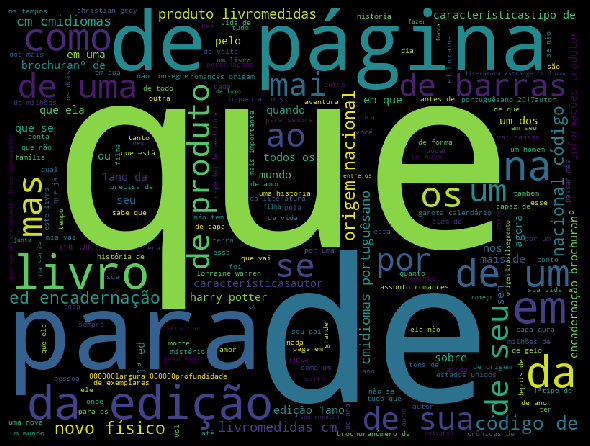

In [90]:
import nltk
import matplotlib.pyplot as plt

try:
  from wordcloud import WordCloud
except:
  !pip install wordcloud

livro_words = ''
livro = words_df[words_df.categoria == 'livro'] # filtrei a categoria livro apenas como exemplo rápido para a demostração

# reune todas as plalavras em um único objeto, veja.
for val in livro.descricao:
  text = val.lower()
  for words in text:
    livro_words = livro_words + words
    # todas as palavras das descrições da categoria livro no mesmo objeto: livro_words. As palavras são inseridas letra por letra

# Gera uma imagem da nuvem de palavras (Generate a word cloud image)
livro_wordcloud = WordCloud(width=800, height=600).generate(livro_words)

# Word cloud da categoria Livro
plt.figure( figsize=(8,8), facecolor='k')
plt.imshow(livro_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0) # Preenchimento entre a borda e a figura
plt.show()

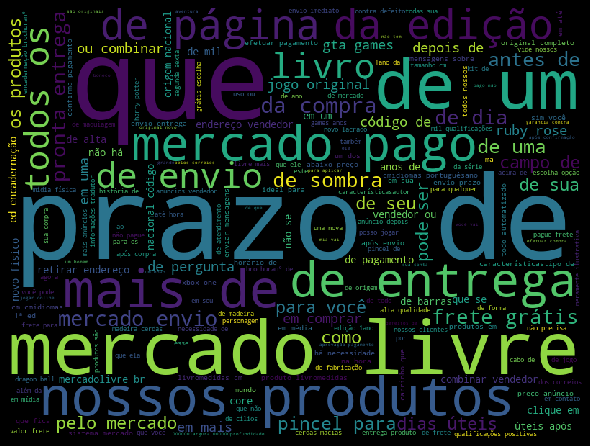

In [92]:

all_words = ''

allwords = words_df[words_df.categoria != '']


# reune todas as plalavras em um único objeto, veja.
for i in allwords.descricao:
  text = i.lower()
  for words in text:
    all_words = all_words + words
    # todas as palavras das descrições da categoria livro no mesmo objeto: livro_words. As palavras são inseridas letra por letra

# Gera uma imagem da nuvem de palavras (Generate a word cloud image)
all_wordcloud = WordCloud(width=800, height=600).generate(all_words)

# Word cloud da categoria Livro
plt.figure( figsize=(8,8), facecolor='k')
plt.imshow(all_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0) # Preenchimento entre a borda e a figura
plt.show()


In [75]:
words_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916 entries, 0 to 4079
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nome       2916 non-null   object
 1   descricao  2916 non-null   object
 2   categoria  2916 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB
